## 演習1

### 次のDataFrameを準備します。

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    "x": np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
    "y": np.array([50, 45, 40, 35, 30, 25 ,20, 15, 10, 5])
})
df

,x,y
0,0,50
1,1,45
2,2,40
3,3,35
4,4,30
5,5,25
6,6,20
7,7,15
8,8,10
9,9,5


### 1.1 DataFrame(df) の x, y についての散布図を出力してください。

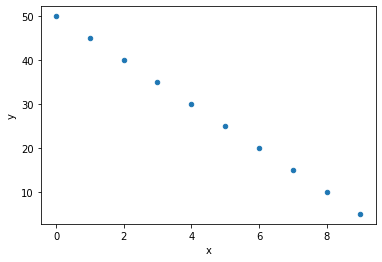

In [ ]:
df.plot.scatter("x", "y")

### 1.2 `y` を目的変数、`x` を説明変数として線形回帰によって分析し、係数と切片を表示してください。

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df[["x"]], df["y"])

print("coef_:", reg.coef_)
print("intercept_:", reg.intercept_)

coef_: [-5.]
intercept_: 50.00000000000001


### 1.3 DataFrame（df） に 推論したyである preg_y を追加して表示してください。

In [ ]:
df["preg_y"] = reg.predict(df[["x"]])
df

,x,y,preg_y
0,0,50,50.0
1,1,45,45.0
2,2,40,40.0
3,3,35,35.0
4,4,30,30.0
5,5,25,25.0
6,6,20,20.0
7,7,15,15.0
8,8,10,10.0
9,9,5,5.0


### 1.4 DataFrame（df）の散布図に回帰式を表示してください。

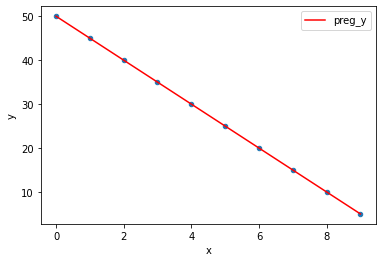

In [ ]:
ax = df.plot.scatter("x", "y")
# ax.plot(df["x"], reg.predict(df[["x"]]), color="red")
df.plot("x", "preg_y", ax=ax, color="red")

### 1.5 `x` が100のとき、推論した `y` を表示してください。

In [ ]:
print(reg.predict([[100]])[0])

-450.00000000000017


## 演習2

### 2.1 wgetコマンド以下のURLからでファイル（mydata.csv）をダウンロードしてください。

```
https://gist.githubusercontent.com/murayama333/b897efa5d90a96f2b851bf14f1a6f8d3/raw/874c9771da2ea22365873112ef481537d094052c/mydata.csv
```

In [ ]:
!wget https://gist.githubusercontent.com/murayama333/b897efa5d90a96f2b851bf14f1a6f8d3/raw/874c9771da2ea22365873112ef481537d094052c/mydata.csv

--2021-02-15 06:46:32--  https://gist.githubusercontent.com/murayama333/b897efa5d90a96f2b851bf14f1a6f8d3/raw/874c9771da2ea22365873112ef481537d094052c/mydata.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53 [text/plain]
Saving to: ‘mydata.csv.8’

mydata.csv.8        100%[===================>]      53  --.-KB/s    in 0s      

2021-02-15 06:46:32 (2.97 MB/s) - ‘mydata.csv.8’ saved [53/53]



### 2.2 pandasのDataFrameで mydata.csv を表示してください。

> DataFrameを代入する変数名は mydata_df とします。

In [ ]:
mydata_df = pd.read_csv("mydata.csv")
mydata_df

,x,y
0,0,55
1,1,42
2,2,45
3,3,35
4,4,26
5,5,18
6,6,24
7,7,15
8,8,12
9,9,2


### 2.3 DataFrame（mydata_df）の `x` と `y` の散布図を表示してください。

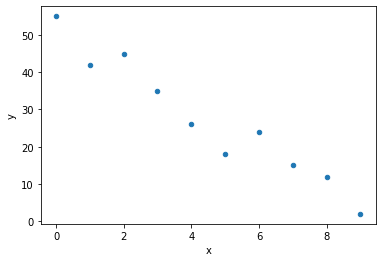

In [ ]:
mydata_df.plot.scatter("x", "y")

### 2.4 DataFrame（mydata_df）の `x` と `y` について相関係数を表示してください。

In [ ]:
mydata_df.corr()

,x,y
x,1.000000,-0.970458
y,-0.970458,1.000000


### 2.5 `y` を目的変数、 `x` を説明変数として線形回帰によって分析し、係数と切片を表示してください。

In [ ]:
reg = LinearRegression()
reg.fit(mydata_df[["x"]], mydata_df["y"])

print("coef_:", reg.coef_)
print("intercept_:", reg.intercept_)

coef_: [-5.32121212]
intercept_: 51.345454545454544


### 2.6 DataFrame（mydata_df） に 推論したyである `preg_y` を追加して表示してください。


In [ ]:
mydata_df["preg_y"] = reg.predict(mydata_df[["x"]])
mydata_df

,x,y,preg_y
0,0,55,51.345455
1,1,42,46.024242
2,2,45,40.703030
3,3,35,35.381818
4,4,26,30.060606
5,5,18,24.739394
6,6,24,19.418182
7,7,15,14.096970
8,8,12,8.775758
9,9,2,3.454545


### 2.7 DataFrame（mydata_df）の散布図に回帰式を表示してください。

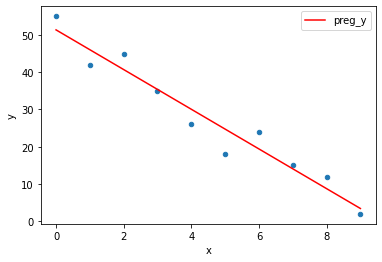

In [ ]:
ax = mydata_df.plot.scatter("x", "y")
# ax.plot(df["x"], reg.predict(df[["x"]]), color="red")
mydata_df.plot("x", "preg_y", ax=ax, color="red")

### 2.8 （参考）DataFrame(mydata_df) の y と preg_y から平均二乗誤差（MSE）を表示してみましょう。

> 平均二乗誤差（MSE）とは、回帰分析の結果を評価する指標です。値が小さいほど推論値と実測値の差が小さいと言えます。

#### 2.8.1 DataFrame(mydata_df) の y と preg_y の差分を求めて `diff` 列とし、DataFrameに追加して表示してください。

In [ ]:
mydata_df["diff"] = mydata_df["y"] -  mydata_df["preg_y"]
mydata_df

,x,y,preg_y,diff
0,0,55,51.345455,3.654545
1,1,42,46.024242,-4.024242
2,2,45,40.703030,4.296970
3,3,35,35.381818,-0.381818
4,4,26,30.060606,-4.060606
5,5,18,24.739394,-6.739394
6,6,24,19.418182,4.581818
7,7,15,14.096970,0.903030
8,8,12,8.775758,3.224242
9,9,2,3.454545,-1.454545


#### 2.8.2 DataFrame(mydata_df) の diff 列の二乗値を求めて `diff_square` 列とし、DataFrameに追加して表示してください。

In [ ]:
mydata_df["diff_square"] =  mydata_df["diff"] ** 2
mydata_df

,x,y,preg_y,diff,diff_square
0,0,55,51.345455,3.654545,13.355702
1,1,42,46.024242,-4.024242,16.194527
2,2,45,40.703030,4.296970,18.463949
3,3,35,35.381818,-0.381818,0.145785
4,4,26,30.060606,-4.060606,16.488522
5,5,18,24.739394,-6.739394,45.419431
6,6,24,19.418182,4.581818,20.993058
7,7,15,14.096970,0.903030,0.815464
8,8,12,8.775758,3.224242,10.395739
9,9,2,3.454545,-1.454545,2.115702


#### 2.8.3 DataFrame(mydata_df) の diff_square 列の平均値（MSE: 平均二乗誤差）を表示してください。

In [ ]:
mydata_df["diff_square"].mean()


14.438787878787883

#### 2.8.4 以下のmean_squared_error関数で同等の結果が得られることを確認してください。

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(mydata_df[["y"]], mydata_df["preg_y"])

14.438787878787881

## 演習3

### 3.1 wgetコマンド以下のURLからでファイル（petal.csv）をダウンロードしてください。

```
https://gist.githubusercontent.com/murayama333/9822fd2d1c36d771d315c7790be77348/raw/cf1d40553c77841dd341c98f84d50aa9ef6fde96/petal.csv
```

In [ ]:
!wget https://gist.githubusercontent.com/murayama333/9822fd2d1c36d771d315c7790be77348/raw/cf1d40553c77841dd341c98f84d50aa9ef6fde96/petal.csv

--2021-02-15 06:46:32--  https://gist.githubusercontent.com/murayama333/9822fd2d1c36d771d315c7790be77348/raw/cf1d40553c77841dd341c98f84d50aa9ef6fde96/petal.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 813 [text/plain]
Saving to: ‘petal.csv.2’

petal.csv.2         100%[===================>]     813  --.-KB/s    in 0s      

2021-02-15 06:46:33 (36.9 MB/s) - ‘petal.csv.2’ saved [813/813]



### 3.2 pandasのDataFrameで petal.csv を表示してください。

> DataFrameを代入する変数名は petal_df とします。

In [ ]:
petal_df = pd.read_csv("petal.csv")
petal_df

,length,width
0,4.7,1.4
1,4.5,1.5
2,4.9,1.5
3,4.0,1.3
4,4.6,1.5
...,...,...
95,5.2,2.3
96,5.0,1.9
97,5.2,2.0
98,5.4,2.3


> petal とは花びらを意味します。 ここでは花びらの縦幅（length） から横幅を推論するプログラムを作成します。

### 3.3 DataFrame（petal_df）の概要を表示してください。

In [ ]:
petal_df.describe()

,length,width
count,100.000000,100.000000
mean,4.906000,1.676000
std,0.825578,0.424769
min,3.000000,1.000000
25%,4.375000,1.300000
50%,4.900000,1.600000
75%,5.525000,2.000000
max,6.900000,2.500000


### 3.4 DataFrame（petal_df）の `length` についてヒストグラムを表示してください。

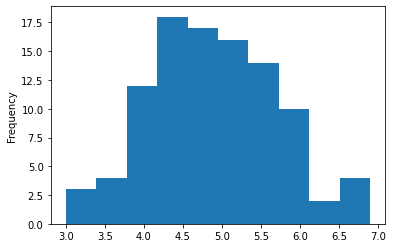

In [ ]:
petal_df["length"].plot.hist()

### 3.5 DataFrame（petal_df）の `width` についてヒストグラムを表示してください。

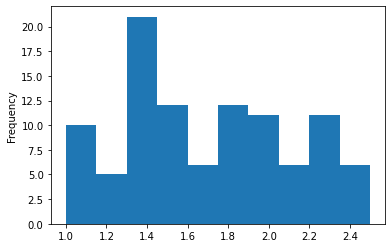

In [ ]:
petal_df["width"].plot.hist()

### 3.6 DataFrame（petal_df）の `length` と `width` の散布図を表示してください。

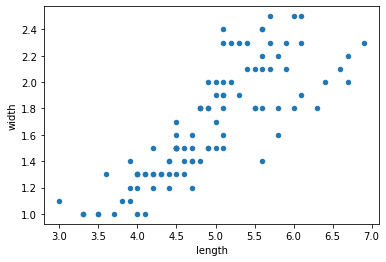

In [ ]:
petal_df.plot.scatter("length", "width")

### 3.6 DataFrame（petal_df）の `length` と `width` について相関係数を表示してください。

In [ ]:
petal_df.corr()

,length,width
length,1.000000,0.823348
width,0.823348,1.000000


### 3.7 `width` を目的変数、`length` を説明変数として線形回帰によって分析し、係数と切片を表示してください。

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(petal_df[["length"]], petal_df["width"])

print("coef_:", reg.coef_)
print("intercept_:", reg.intercept_)

coef_: [0.4236207]
intercept_: -0.40228316863377334


### 3.8 DataFrame（petal_df）の散布図に回帰式を表示してください。

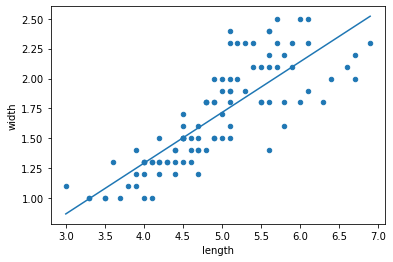

In [ ]:
x = np.arange(petal_df["length"].min(), petal_df["length"].max() + 0.1, 0.1).reshape(-1, 1)
ax = petal_df.plot.scatter("length", "width")
ax.plot(x, reg.predict(x))

### 3.9 DataFrame（petal_df）のデータを訓練データ70件、テストデータ30件に分割してください。

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(petal_df["length"].values, petal_df["width"].values, train_size=0.7, random_state=3)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70,)
(30,)
(70,)
(30,)


### 3.10 DataFrame（petal_df）の訓練データで学習して、係数と切片を表示してください。
> width を目的変数、length を説明変数として線形回帰によって分析します。

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train)

print(reg.coef_)
print(reg.intercept_)

[0.39082918]
-0.2579357541822549


### 3.11 学習済みモデルについて、訓練データとテストデータの決定係数をそれぞれ表示してください。


In [ ]:
print("score - train:", reg.score(x_train.reshape(-1, 1), y_train))
print("score - tet:", reg.score(x_test.reshape(-1, 1), y_test))

score - train: 0.7107455156123341
score - tet: 0.5942306119945272
